In [1]:
from numqt import *

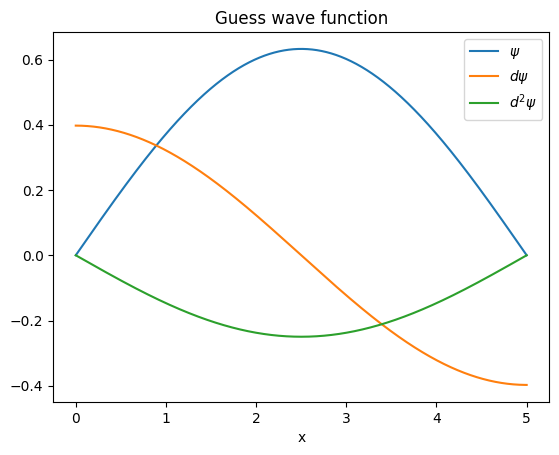

In [2]:
#-----------------------------------------------------------
# Characteristic lengths of the problem
#-----------------------------------------------------------
Lx = 5 # Characteristic length along x

#-----------------------------------------------------------
# Problem's parameters
#-----------------------------------------------------------
hbar = 1
m = 1 # e-mass

#-----------------------------------------------------------
# Simulation parameters
#-----------------------------------------------------------
xbounds = (0, Lx) # 10 times the confinement length
dx = 0.0001 # spacing
nx = int(np.abs(xbounds[1] - xbounds[0]) / dx)

#-----------------------------------------------------------
# Creating grid
#-----------------------------------------------------------
mesh_obj = Mesh(dims=1,
                 xbounds=xbounds,
                 nx=nx)

dimx = mesh_obj.Nx
#-----------------------------------------------------------
# Guess basis
#-----------------------------------------------------------
N_states = 100
psi_fn = lambda n, mesh: iw_state(n, mesh, center=Lx/2, L = Lx)
basis = (psi_fn, N_states)
for i in range(3):
    plt.plot(mesh_obj.mesh_x, psi_fn(0, mesh_obj.mesh_x)[i], label = [r"$\psi$", r"$d\psi$", r"$d^2\psi$"][i])
plt.xlabel("x")
plt.title("Guess wave function")
plt.legend()

In [3]:
#-----------------------------------------------------------
# Obtaining canonical operators
#-----------------------------------------------------------
operators = canonic_ops(mesh_obj, basis = basis, ops_to_compute = ["p2"], additional_subspaces = None, hbar=1)
px2 = operators.get_ops()["p2"]

#-----------------------------------------------------------
# Constructing the Hamiltonian
#-----------------------------------------------------------
H = Hamiltonian(H=px2 / (2*m), mesh = mesh_obj, basis = basis)

In [4]:
k = N_states-2
energies, wavefunctions = H.solve(k)

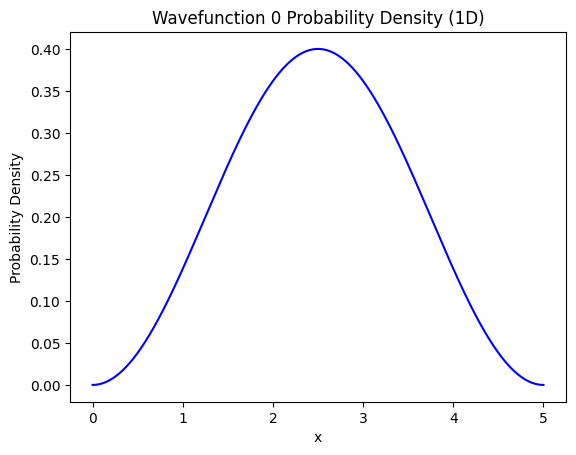

In [5]:
H.plot(0)

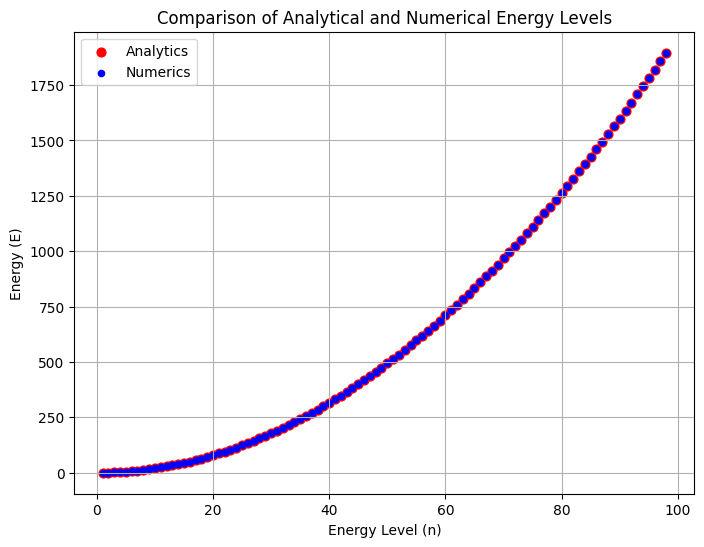

In [6]:
# Define the analytical energy function
def energy(n):
    return n**2 * np.pi**2 * hbar**2  / (2 * m * Lx**2)

# Generate analytical energy levels
analytical_energies = sorted([energy(n) for n in range(1,k+1)])

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(range(1,k+1), analytical_energies, c="r", s=40, label="Analytics")
plt.scatter(range(1,k+1), energies, c="b", s=20, label="Numerics")
plt.legend()
plt.ylabel("Energy (E)")
plt.xlabel("Energy Level (n)")
plt.title("Comparison of Analytical and Numerical Energy Levels")
plt.grid(True)

plt.show()